# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.


*  $x_1$:  Representa el diámetro del "cojinete"
*  $x_2$: Representa el diámetro de la "flecha"





### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Para determinar la probabilidad de interferencia, necesitamos encontrar la distribución de la diferencia, es decir, $Y=x_2-x_1$



***Propiedad de la diferencia de dos distribuciones Normales***


 Si $x_1 \sim N(\mu_1, \sigma_1^2)$ y  $x_2 \sim N(\mu_1, \sigma_1^2)$, entonces $Y=x_1 - x_2$ sigue una distribución normal con:


*   Media $ \mu_Y =\mu_1-\mu_2$
*   Varianza $\sigma_Y^2=\sigma_1^2+\sigma_2^2$


Es decir, $Y\sim N(\mu_1-\mu_2$,$\sigma_1^2+\sigma_2^2$).Por lo tanto,la probabilidad de interferencia es $P(Y≥0)$

Una forma de implementarlo es mediante el siguiente código




In [122]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm



In [123]:
#Valores de cada variable
    #X_1
miu_1=1.5
varianza_1=0.0016
desv_estandar_1=np.sqrt(varianza_1)

    #X_2
miu_2=1.48
varianza_2=0.0009


#Definimos los parámetros de Y∼N()
miu_y=miu_1-miu_2     #Media de Y
varianza_y= varianza_1+varianza_2    #Varianza de Y
desv_estandar_y= np.sqrt(varianza_y)


In [126]:
def interferencia():                           #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    Y = random.gauss(miu_y,desv_estandar_y)    #La funcion gauss genera un número que sigue una distribucion normal con
    if  0.0< Y:                                          # la media y la desvicion estandar especificados.
        interf += 1
    return interf

In [129]:
interferencia()

1

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [130]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [136]:
X = prob_inter(1000)                # Asignamos valores a n y realizamos el experimento

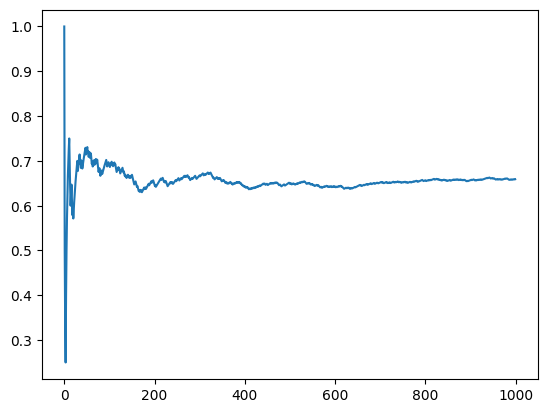

In [80]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [82]:
print(np.mean(X), np.std(X)) # Imprimimos la media (mean) y la desviación estandar (std) de la muestra X

0.655511115296526 0.028095277342988317


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [165]:
def modelo(n):
    lista=[]  # En esta lista almacenaremos los resultados de las "n" repeticiones
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s)) #Se calcula la media de los resultados de cada
    return lista

In [168]:
Y=modelo(383)

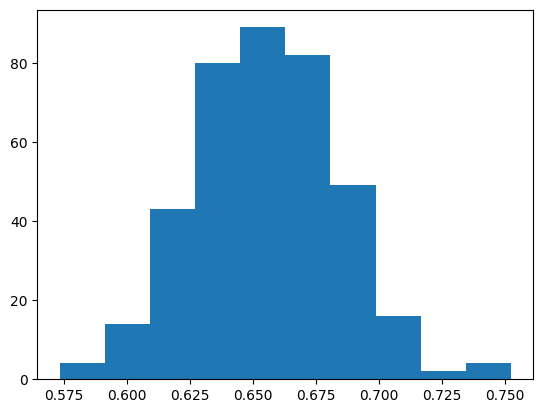

In [169]:
plt.hist(Y)
plt.show()

In [114]:
print(np.mean(Y), np.std(Y)) # Imprimimos la media (mean) y la desviación estandar (std) de la muestra Y

0.655342302119695 0.030173684261673155


### Paso 7. Hallamos el intervalo de confianza.

Un intervalo de confianza para una media poblacional con una desviación típica poblacional conocida se basa en la conclusión del teorema del límite central de que la distribución muestral de las medias muestrales sigue una distribución aproximadamente normal.


$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

El intervalo de confianza se rige por dos cosas, el nivel de confianza elegido, $z_{\alpha/2}$, y la desviación típica de la distribución muestral,$s$.

In [138]:
np.mean(Y) #Calculamos la media de Y

0.655342302119695

In [139]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) #Calculamos el intervalo de confianza con un nivel de confianza de 95%

(0.6469785835518091, 0.6637060206875809)

### Para determinar el número de simulaciones

 El número de simulaciones es importante para garantizar que las estimaciones sean confiables y precisas.

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

Donde


*   $N$ es el Número mínimo de simulaciones
*   $\sigma$ es la desviación estandar
*   $z_{\alpha/2}$ Es el valor crítico correspondiente a nuestro nivel de confianza
*   ${\epsilon}$ Es el margen de error



In [142]:
N = ((2*np.std(X)*1.96)/0.01)**2

In [143]:
print(N)

383.908954452062


### Podemos comparar con la solución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.


In [144]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [145]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.3107640437300192